<a href="https://colab.research.google.com/github/prxska/Ev3MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest

In [1]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022.csv


<ipython-input-1-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Filtrar outliers extremos en MatchKills (opcional, pero ayuda si hay valores muy altos)
limite = df['MatchKills'].quantile(0.99)
df_filtrado = df[df['MatchKills'] < limite].copy()

# 2. Variables predictoras
features = [
    'RoundStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'MatchAssists',
    'TravelledDistance'
]

X_rf = df_filtrado[features]
y_rf = df_filtrado['MatchKills']

# 3. División de datos
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# 4. Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# 5. Evaluación
y_pred_rf = rf_model.predict(X_test_rf)
print("MSE (Random Forest - MatchKills):", mean_squared_error(y_test_rf, y_pred_rf))
print("R² (Random Forest - MatchKills):", r2_score(y_test_rf, y_pred_rf))



MSE (Random Forest - MatchKills): 28.304044235333173
R² (Random Forest - MatchKills): 0.18920455120864732


Conclusión del modelo Random Forest para MatchKills
El modelo Random Forest fue entrenado con cinco variables del jugador para predecir la cantidad de kills (MatchKills) en una partida. Los resultados obtenidos fueron:

Error cuadrático medio (MSE): 28.30

Coeficiente de determinación (R²): 0.189

Esto indica que el modelo es capaz de explicar aproximadamente el 18.9% de la variación en las kills de un jugador, lo cual representa una mejora significativa respecto a los intentos anteriores con otras variables como TravelledDistance.

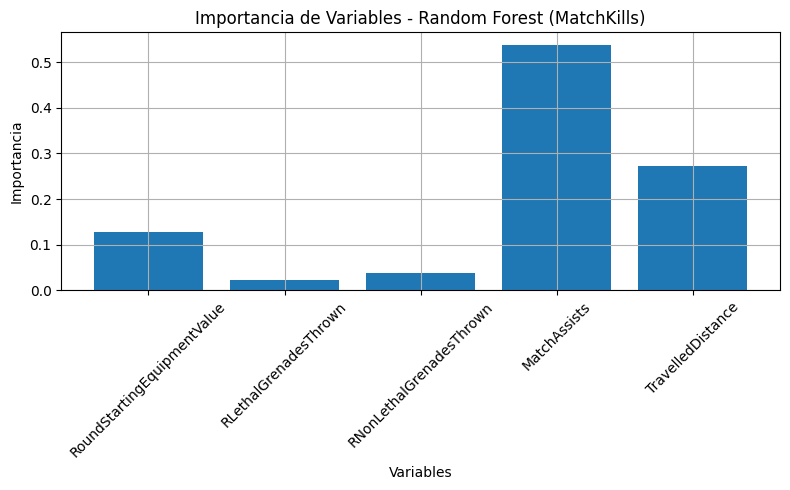

In [3]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Entrenar modelo con configuración ajustada
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Importancia de variables
importancias = rf_model.feature_importances_

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(features, importancias)
plt.title("Importancia de Variables - Random Forest (MatchKills)")
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()